# Personal loan: 
The personal loan given to the customers by their income,age,employment history ,repayment capacity.
here we are going to predict the customer who is going to take  the personal loan by factors which  are given in the customers data.These are helpul for the banking sector for giving or calling the customers who meet the criteria for the banking personal  loan.

In [1]:
# Loading the packages 

In [2]:
import pandas as pd
import numpy as np

In [4]:
bkloan=pd.read_csv("F:/csv datasets/Bank_Personal_Loan_Modelling.csv")

In [5]:
bkloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bkloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
bkloan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
bkloan['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
x=bkloan.drop(['ID','ZIP Code','Personal Loan'],axis=1)
y=bkloan['Personal Loan']

In [9]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


# Random Forest Classifier

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
r_pred=rfc.predict(x_test)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

AUC_averages=cross_val_score(rfc,x_train,y_train,cv=10,scoring='roc_auc')

In [13]:
print("==confusion matrix===")
print(confusion_matrix(r_pred,y_test))
print("==claasification Report==")
print(classification_report(r_pred,y_test))
print("==Roc_curve==")
print(roc_auc_score(y_test,r_pred))

==confusion matrix===
[[893   8]
 [  2  97]]
==claasification Report==
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       901
           1       0.92      0.98      0.95        99

    accuracy                           0.99      1000
   macro avg       0.96      0.99      0.97      1000
weighted avg       0.99      0.99      0.99      1000

==Roc_curve==
0.9607874434690078


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=2500)
model=log.fit(x_train,y_train)
l_pred=log.predict(x_test)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

AUC_averages=cross_val_score(log,x_train,y_train,cv=10,scoring='roc_auc')

In [17]:
print("==confusion matrix===")
print(confusion_matrix(l_pred,y_test))
print("==claasification Report==")
print(classification_report(l_pred,y_test))
print("==Roc_curve==")
print(roc_auc_score(y_test,l_pred))

==confusion matrix===
[[883  35]
 [ 12  70]]
==claasification Report==
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       918
           1       0.67      0.85      0.75        82

    accuracy                           0.95      1000
   macro avg       0.83      0.91      0.86      1000
weighted avg       0.96      0.95      0.96      1000

==Roc_curve==
0.8266294227188081


# Decision Tree classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
d_pred=dtree.predict(x_test)


In [19]:
print("==confusion matrix===")
print(confusion_matrix(d_pred,y_test))
print("==claasification Report==")
print(classification_report(d_pred,y_test))
print("==Roc_curve==")
print(roc_auc_score(y_test,d_pred))

==confusion matrix===
[[891   7]
 [  4  98]]
==claasification Report==
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       898
           1       0.93      0.96      0.95       102

    accuracy                           0.99      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000

==Roc_curve==
0.9644320297951583


# Random forest with Hyperparameters

In [15]:
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]

In [16]:
grid_param={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
           }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestClassifier(random_state=1)
RFR_random=RandomizedSearchCV(estimator=RFR,
                              param_distributions=grid_param,
                             n_iter=500,cv=5,verbose=2,random_state=42,n_jobs=-1)


In [ ]:
RFR_random.fit(x,y)
print(RFR_random.best_params_)

In [20]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=1500, 
                               bootstrap = True,
                               max_features = 'sqrt',
                            max_depth=40,
                            min_samples_split=2,
                            min_samples_leaf=1)

random_model=rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

AUC_averages=cross_val_score(rfc,x_train,y_train,cv=10,scoring='roc_auc')

In [22]:
print("==confusion matrix===")
print(confusion_matrix(rfc_predict,y_test))
print("==claasification Report==")
print(classification_report(rfc_predict,y_test))
print("==Roc_curve==")
print(roc_auc_score(y_test,rfc_predict))

==confusion matrix===
[[894   8]
 [  1  97]]
==claasification Report==
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       902
           1       0.92      0.99      0.96        98

    accuracy                           0.99      1000
   macro avg       0.96      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000

==Roc_curve==
0.9613461026868848


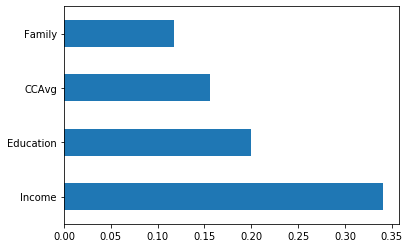

In [23]:
import matplotlib.pyplot as plt


feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Random Forest with Over_sampling

In [ ]:
#pip install imbalanced-learn

In [ ]:
#Balancing the dataset By over_sampling

In [24]:
from imblearn.over_sampling import SMOTE

C:\Users\ralla\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\ralla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
oversampling=SMOTE()

In [26]:
X,Y=oversampling.fit_resample(x,y)

C:\Users\ralla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 4520, 1: 4520})


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc_o=RandomForestClassifier()
rfc_o.fit(X_train,Y_train)
pred=rfc_o.predict(X_test)


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


In [31]:
AUC_averages=cross_val_score(rfc_o,X_train,Y_train,cv=10,scoring='roc_auc')

In [32]:
print("==Confusion Matrix==")
print(confusion_matrix(Y_test,pred))
print("==Classification Report==")
print(classification_report(Y_test,pred))
print("Average Roc Curves")
print(AUC_averages)
print("Roc curve")
print(roc_auc_score(Y_test,pred))

==Confusion Matrix==
[[1500    9]
 [   8 1467]]
==Classification Report==
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1509
           1       0.99      0.99      0.99      1475

    accuracy                           0.99      2984
   macro avg       0.99      0.99      0.99      2984
weighted avg       0.99      0.99      0.99      2984

Average Roc Curves
[0.99980938 0.99961876 0.99995643 0.99983116 0.99997277 0.99962965
 0.99961204 0.99989072 0.99973225 0.99975411]
Roc curve
0.9943060282373556


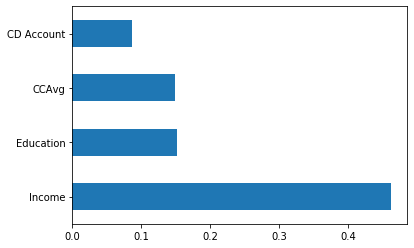

In [33]:
import matplotlib.pyplot as plt


feat_importances = pd.Series(rfc_o.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Logistic Regression with Over_sampling

In [34]:
#converting feature variables into scalar
from sklearn.preprocessing import StandardScaler
x_stand=x.copy()
num_cols=x.iloc[:,0:13]
for i in num_cols:
    scale=StandardScaler().fit(x_stand[[i]])
    x_stand[i]=scale.transform(x_stand[[i]].values.reshape(-1,1))

In [35]:
X_stand,Y_stand=oversampling.fit_resample(x_stand,y)

C:\Users\ralla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_stand,Y_stand,test_size=0.33,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logic_s=LogisticRegression()
model=logic_s.fit(X_Train,Y_Train)
logpred=logic_s.predict(X_Test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


In [39]:
AUC_averages=cross_val_score(logic_s,X_Train,Y_Train,cv=10,scoring='roc_auc')

In [78]:
print("==Confusion Matrix==")
print(confusion_matrix(Y_Test,logpred))
print("==Classification Report==")
print(classification_report(Y_Test,logpred))
print("Average Roc Curves")
print(AUC_averages)
print("Roc curve")
print(roc_auc_score(Y_Test,logpred))

==Confusion Matrix==
[[1361  148]
 [ 125 1350]]
==Classification Report==
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1509
           1       0.90      0.92      0.91      1475

    accuracy                           0.91      2984
   macro avg       0.91      0.91      0.91      2984
weighted avg       0.91      0.91      0.91      2984

Average Roc Curves
[0.96283548 0.97334568 0.95976254 0.97436959 0.9621916  0.96904308
 0.96490864 0.96359722 0.97031824 0.96979367]
Roc curve
0.9085880199031797


# Decision Tree with Over_Sampling

In [40]:
from sklearn.tree import  DecisionTreeClassifier
dtree_o=DecisionTreeClassifier()
dtree_o.fit(X_train,Y_train)
dtree_p=dtree_o.predict(X_test)

In [41]:
AUC_averages=cross_val_score(dtree_o,X_Train,Y_Train,cv=10,scoring='roc_auc')

In [42]:
print("==Confusion Matrix==")
print(confusion_matrix(Y_test,dtree_p))
print("==Classification Report==")
print(classification_report(Y_test,dtree_p))
print("Average Roc Curves")
print(AUC_averages)
print("Roc curve")
print(roc_auc_score(Y_test,dtree_p))

==Confusion Matrix==
[[1489   20]
 [  16 1459]]
==Classification Report==
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1509
           1       0.99      0.99      0.99      1475

    accuracy                           0.99      2984
   macro avg       0.99      0.99      0.99      2984
weighted avg       0.99      0.99      0.99      2984

Average Roc Curves
[0.98184254 0.98677632 0.97696204 0.98343227 0.98345406 0.98351942
 0.98676014 0.99009879 0.98180954 0.98019759]
Roc curve
0.9879493659511855


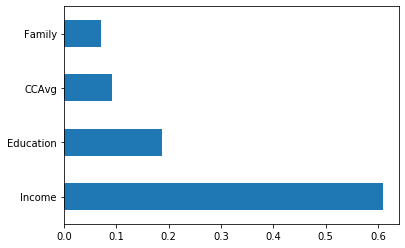

In [43]:
import matplotlib.pyplot as plt


feat_importances = pd.Series(dtree_o.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Conclusion
From these algorithms we can clearly say that randomforest model performing very and accuracy(0.99) and Area Under Curve(0.99)
Income and Education plays the important role for giving personal loans and followed by ccavg and family 

Income-: 
Mostly customer who earn more that hundred thousand dollars taking the loan.Below hundred thousand dollars not prefferring for 
personal loan

Education-:
The Graduates and Post graduates customers preferring the personal loan and The undergraduates mostly not preferring for the banking personal loan 

CCavg-:
customer who are peferring loans their Average spendng on credit card between 3.0 to 6.0 thousand dollars are most of them.

Family-:
Family also one of the factor for personal loand married customers are taking the loans than the single ones